In [10]:
# imports
from skimage.filters import threshold_otsu, rank
from skimage.util import img_as_ubyte
from skimage.io import imread,imsave
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage as sk
from skimage.morphology import binary_dilation,binary_erosion
from skimage.transform import rescale, resize, downscale_local_mean
from skimage import filters
import math
import helpers
import preprocessing
%matplotlib inline

(0.9523941798941798, 45)
(0.012222222222222223, 0)
(0.011878306878306879, -45)
(0.008326719576719576, 18)
(0.005171957671957672, -18)


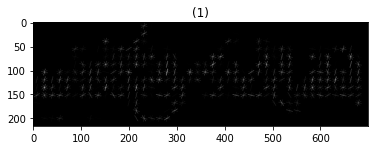

(4472,)


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\objdetect\src\hog.cpp:245: error: (-215:Assertion failed) img.type() == CV_8U || img.type() == CV_8UC3 in function 'cv::HOGDescriptor::computeGradient'


In [13]:
img = helpers.readImageGray("./ACDB/ACdata_base/1/0001.jpg")
img = preprocessing.binarization(img)
img = preprocessing.skeletonization(img)

sy = filters.sobel_h(img)+0.0000000000000000000000000000000000001
sx = filters.sobel_v(img)+0.0000000000000000000000000000000000001
#print(sy,sx)
z = np.rad2deg(np.arctan(sy/sx))
z = z.astype(int)
hist = sk.exposure.histogram(z)
arr = [] 
for i in range(len(hist[0])):
    arr.append((hist[0][i]/(img.shape[0]*img.shape[1]),hist[1][i]))
#arr = np.sort(arr)
arr.sort()
#arr = np.flip(arr)
arr = arr[::-1]
for i in range(5):
    print(arr[i])

fd,imm = sk.feature.hog(img, orientations=8, pixels_per_cell=(16, 16),cells_per_block=(1, 1),visualize=True,transform_sqrt=True,feature_vector=True)
helpers.show_images([imm])
#fd = np.reshape(fd,img.shape)
# for i in range(img.shape[0]):
#     for j in range(img.shape[1]):
#         if img[i][j] ==0:
#             print("fd ",fd[i][j])
print(fd.shape)

hog = cv2.HOGDescriptor()
c_img =  cv2.fromarray(img)
h = hog.compute(c_img)
h = np.reshape(h,(int(h.shape[0]/9),9))
mean = np.mean(h,axis=0)
var = np.var(h,axis=0)
print(mean)